In [1]:
# Data manipulation
import pandas as pd
import numpy as np

import cleaning
import eda
import utils

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import this to silence a warning when converting data column of a dataframe on the fly
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

---
## Loading data & first look

In [2]:
df = utils.read_csv(years=["2014", "2015", "2016", "2017", "2018"])

In [3]:
df[["Stock", "Sector", "Class", "Year"]] = df[["Stock", "Sector", "Class", "Year"]].astype("category")

In [4]:
df.head()

# Get info about dataset
df.info()

# Describe dataset variables
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22077 entries, 0 to 22076
Columns: 226 entries, Stock to Year
dtypes: category(4), float64(222)
memory usage: 37.7 MB


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE VAR [%]
count,2.090600e+04,19989.000000,2.030600e+04,2.087000e+04,1.993900e+04,2.040800e+04,2.037500e+04,2.097600e+04,2.035800e+04,2.071300e+04,...,16299.000000,18264.000000,19952.000000,19650.000000,19690.000000,19213.000000,19462.000000,19598.000000,19655.000000,2.207700e+04
mean,5.161619e+09,3.622214,3.258565e+09,1.970452e+09,1.033333e+08,8.699279e+08,1.368670e+09,5.896979e+08,9.778939e+07,4.925003e+08,...,-0.000596,0.012298,10.978239,0.158858,1.134221,0.783208,3.733922,0.295610,0.365149,2.698893e+02
std,3.197314e+10,312.648170,2.583092e+10,8.735750e+09,7.676062e+08,3.804283e+09,5.662984e+09,2.976454e+09,4.996543e+08,2.484345e+09,...,0.229906,0.263079,1101.098165,3.268154,45.381079,66.524006,174.864701,12.974127,15.030054,1.934617e+04
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3963.131200,-1.051000,-2.662200,-2.369900,-1.003972e+02
25%,5.880737e+07,-0.014700,3.211750e+06,3.035575e+07,0.000000e+00,1.768550e+07,3.564150e+07,-4.433750e+06,0.000000e+00,-8.745000e+06,...,0.000000,0.000000,-0.051125,0.000000,-0.031075,-0.103800,-0.067475,0.000000,-0.013700,-1.947409e+01
50%,4.352510e+08,0.057600,1.530115e+08,1.943525e+08,0.000000e+00,8.062450e+07,1.564000e+08,3.585350e+07,3.697000e+06,2.380000e+07,...,0.000000,0.000000,0.009500,0.000000,0.048000,0.032400,0.000000,0.000000,0.061000,3.909087e+00
75%,2.287259e+09,0.182400,1.180224e+09,8.806035e+08,1.220150e+07,3.699722e+08,6.210870e+08,2.554363e+08,4.969325e+07,1.964680e+08,...,0.035300,0.040000,0.200550,0.058400,0.176800,0.142100,0.150075,0.000000,0.185350,2.750567e+01
max,1.886894e+12,42138.663900,1.581527e+12,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,2.981100,5.400500,153332.333300,293.473000,5468.426400,7039.325900,17646.823500,1542.611000,2042.000000,2.418601e+06


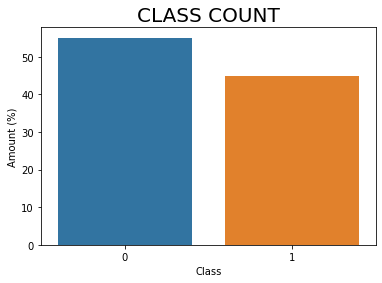

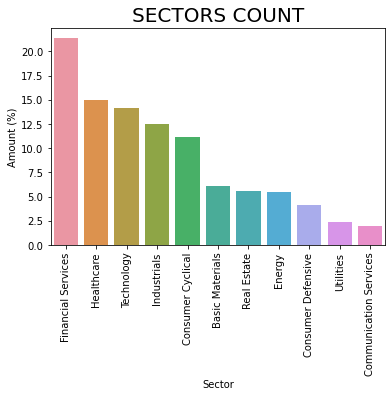

In [5]:
# Plot class distribution
df_class = df['Class'].value_counts() / df.shape[0] * 100
sns.barplot(np.arange(len(df_class)), df_class)
plt.ylabel('Amount (%)')
plt.xlabel('Class')
plt.title('CLASS COUNT', fontsize=20)
plt.show()

# Plot sector distribution
df_sector = df['Sector'].value_counts() / df.shape[0] * 100
sns.barplot(np.arange(len(df_sector)), df_sector)
plt.ylabel('Amount (%)')
plt.xlabel('Sector')
plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

---
## Inorganic stocks

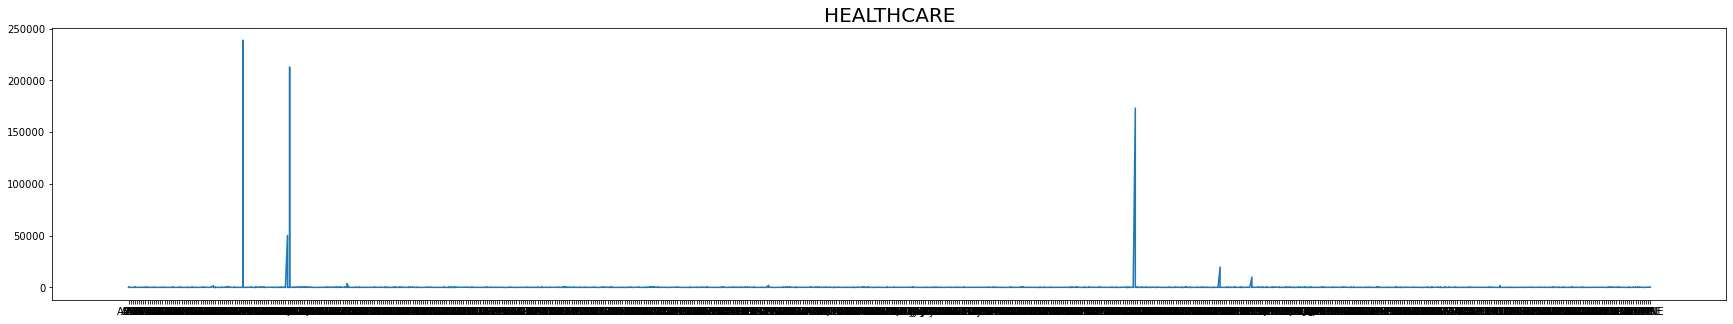

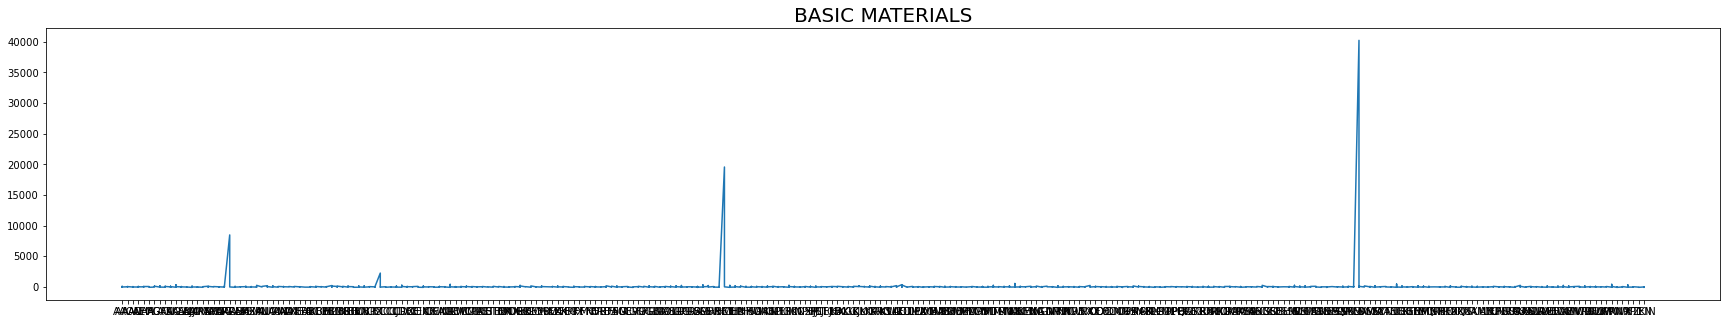

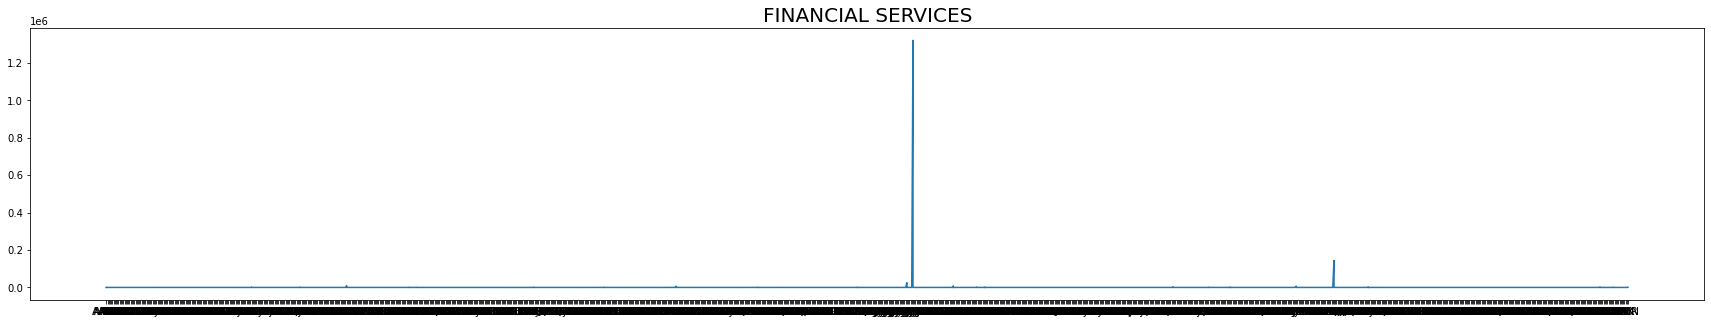

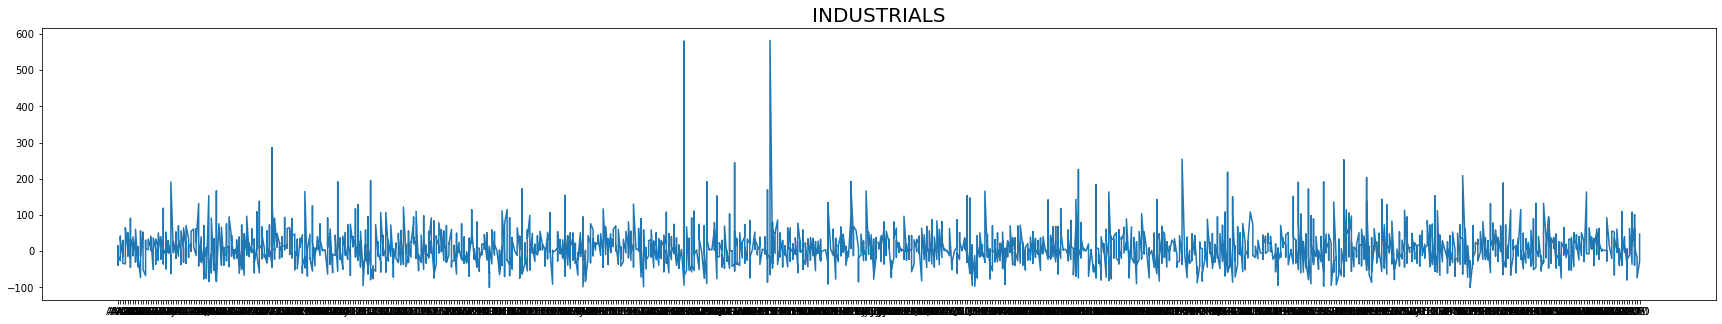

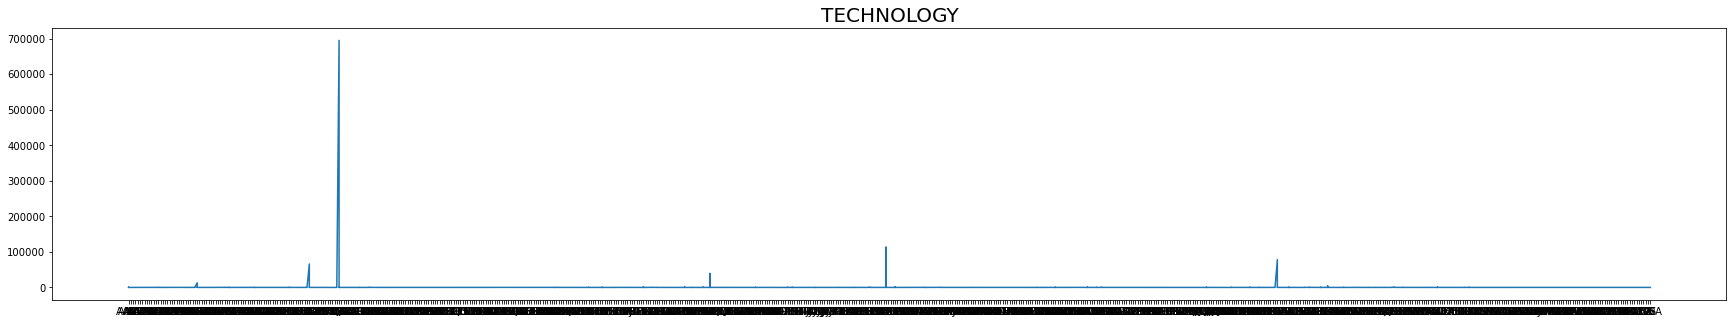

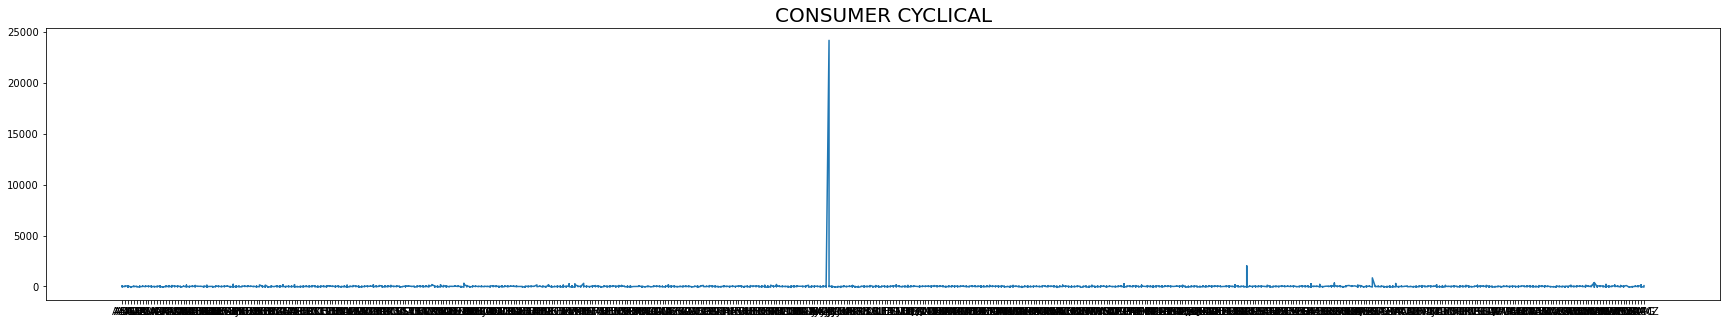

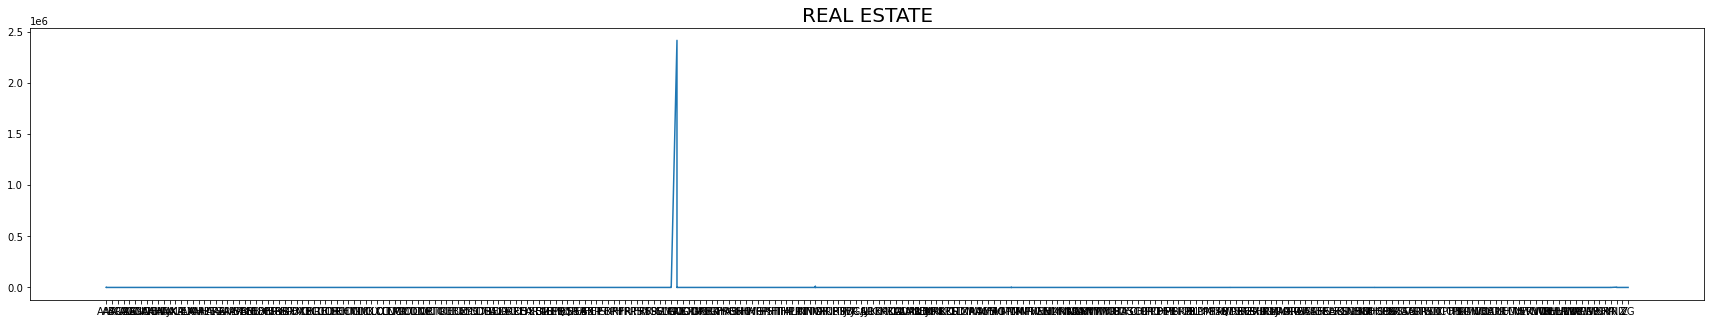

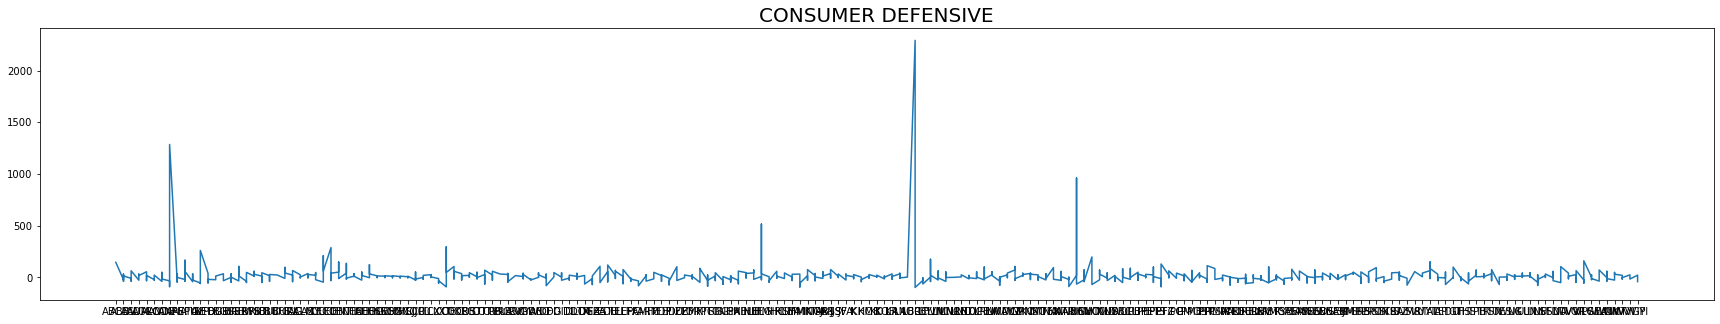

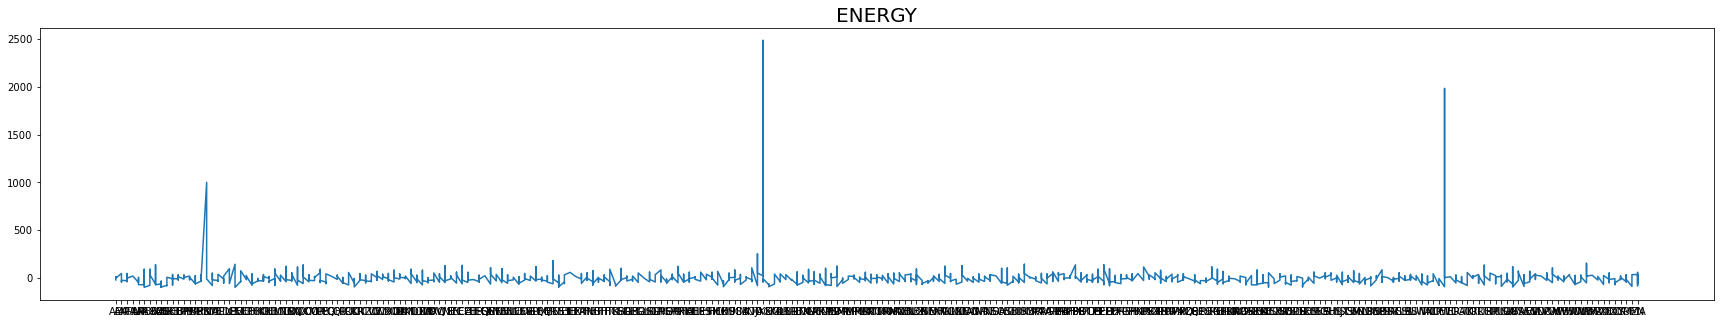

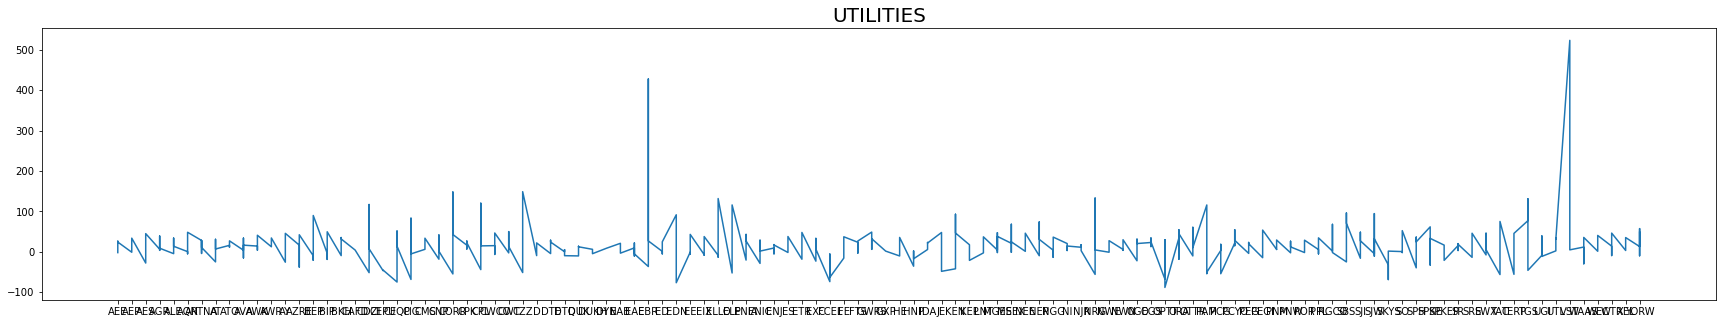

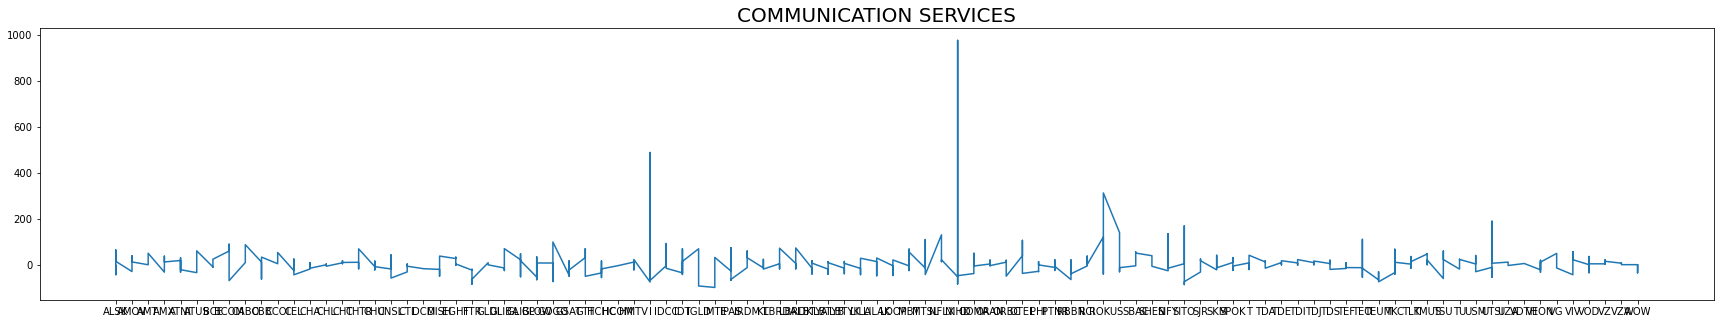

In [6]:
eda.plot_price_variation_per_sector(df)

In [7]:
df_postinorganic = cleaning.remove_inorganic_stocks(df, gain=500)

64 STOCKS with more than 500% gain.
Removed 290 entries.


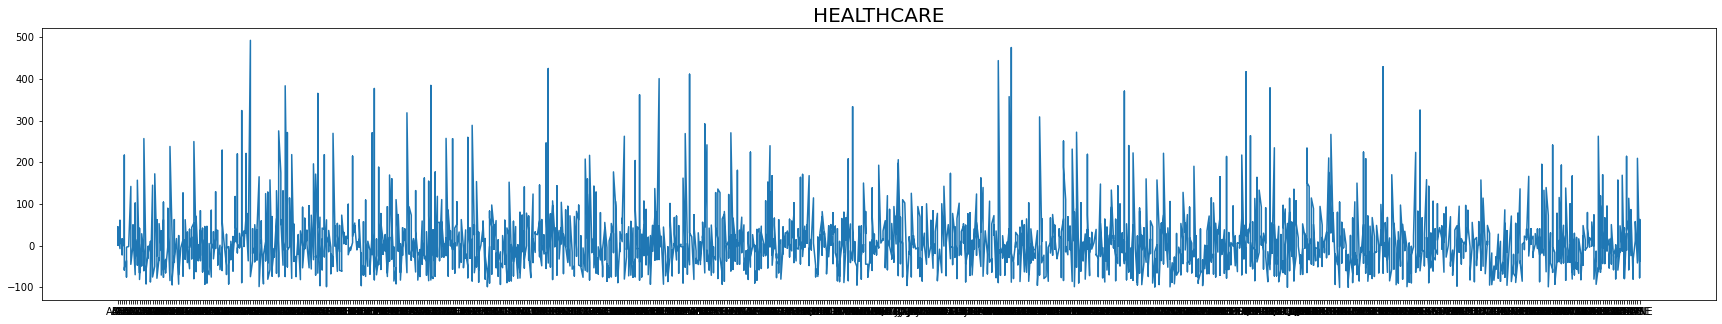

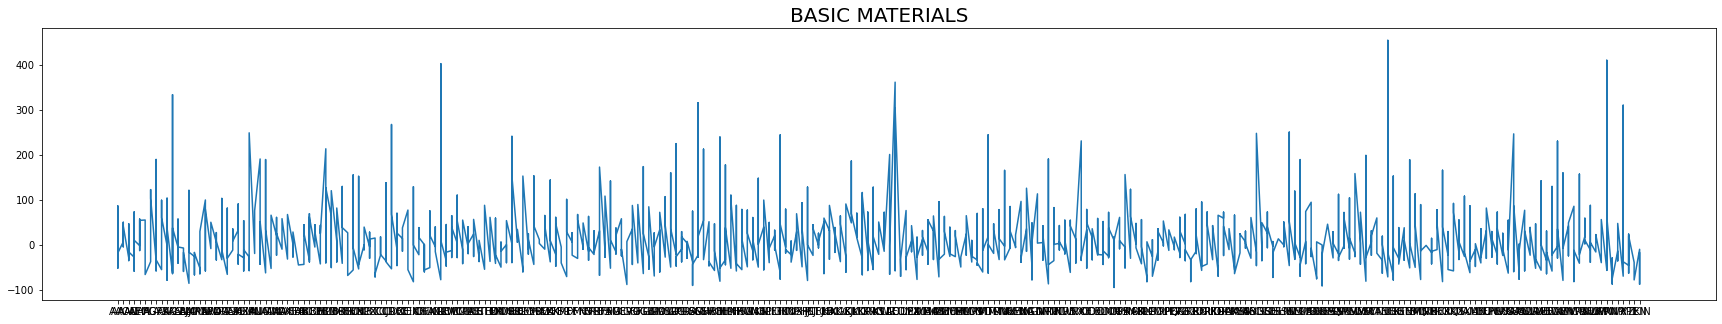

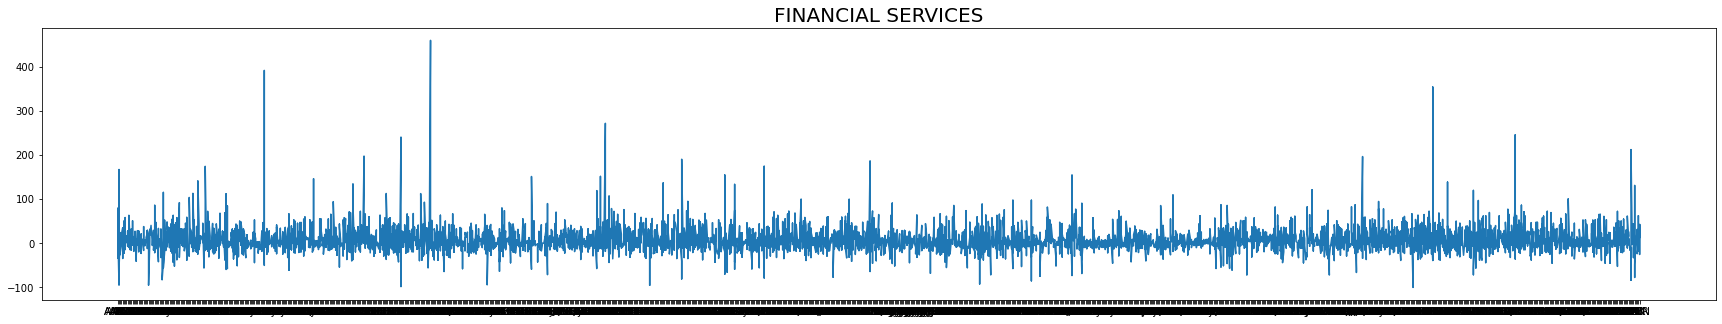

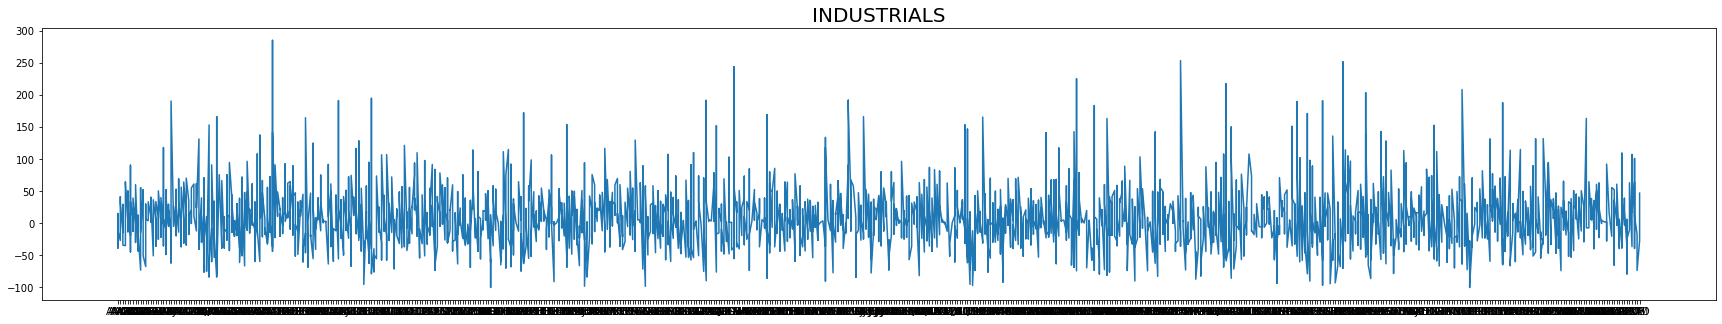

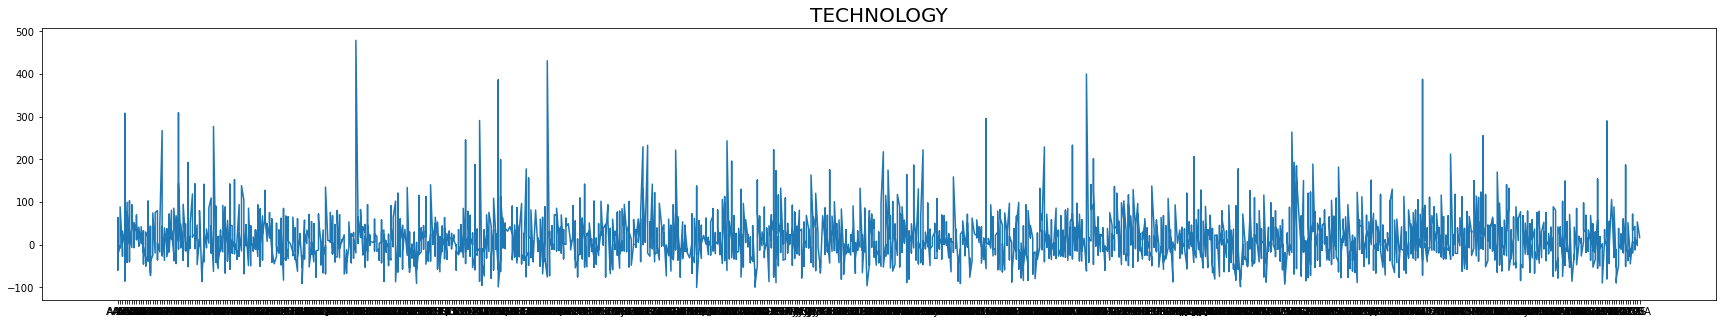

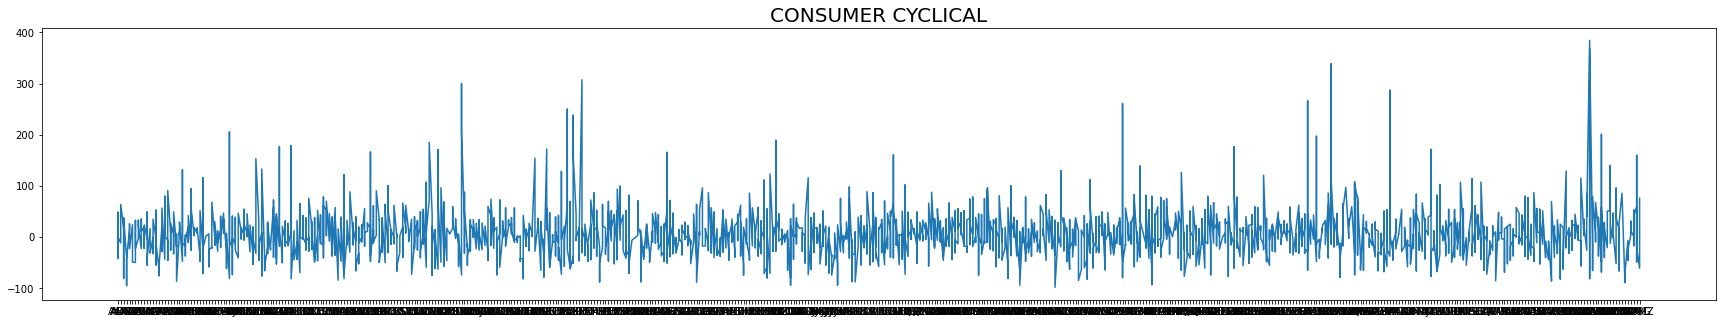

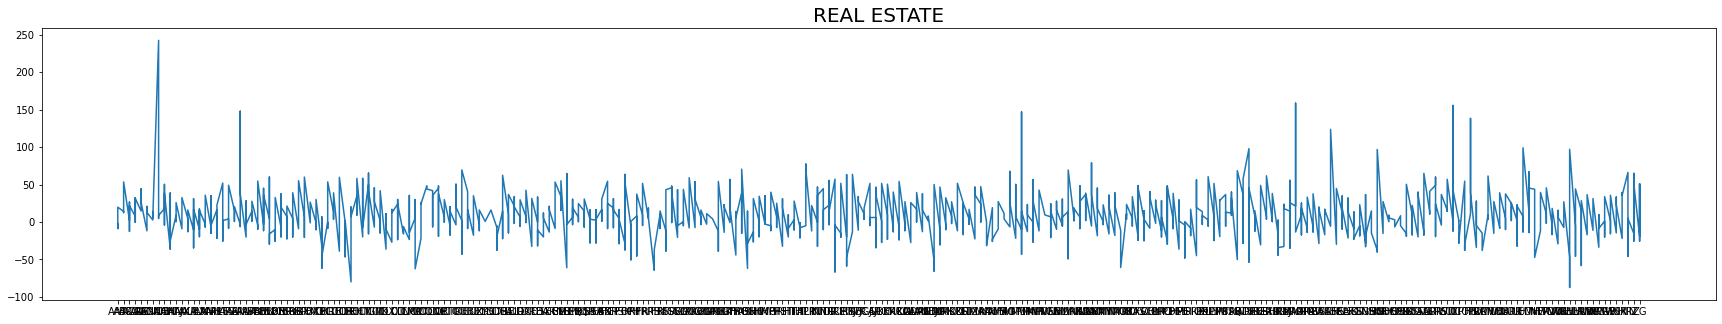

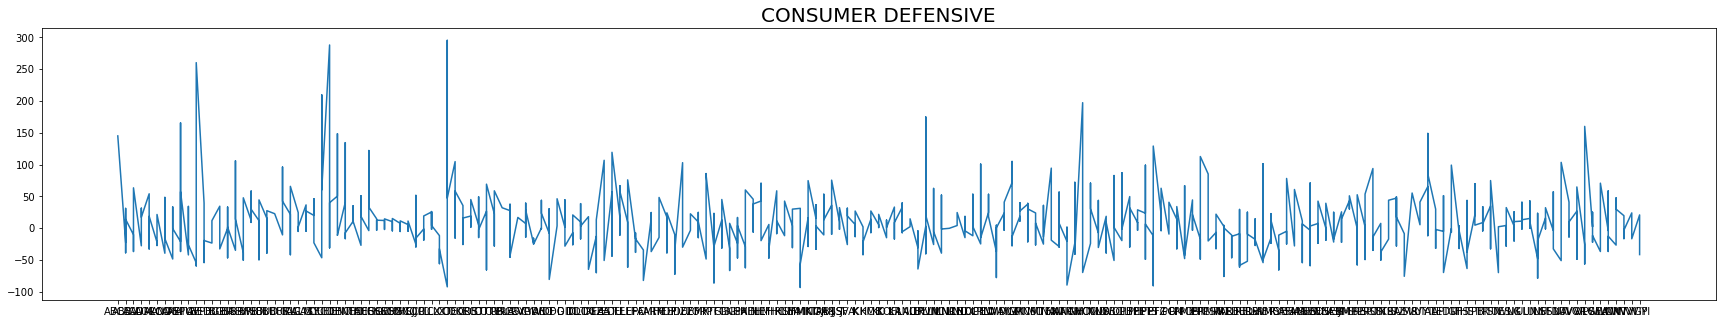

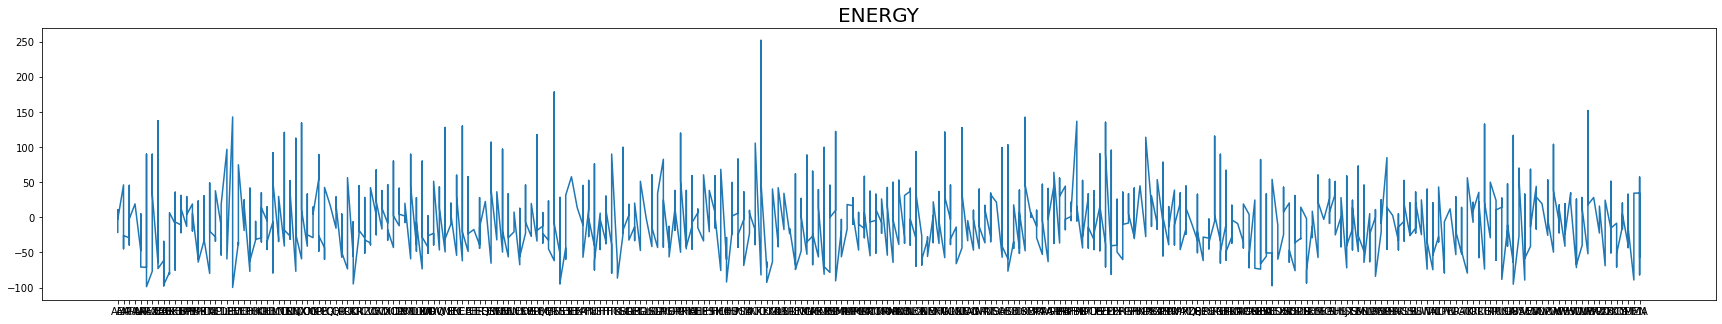

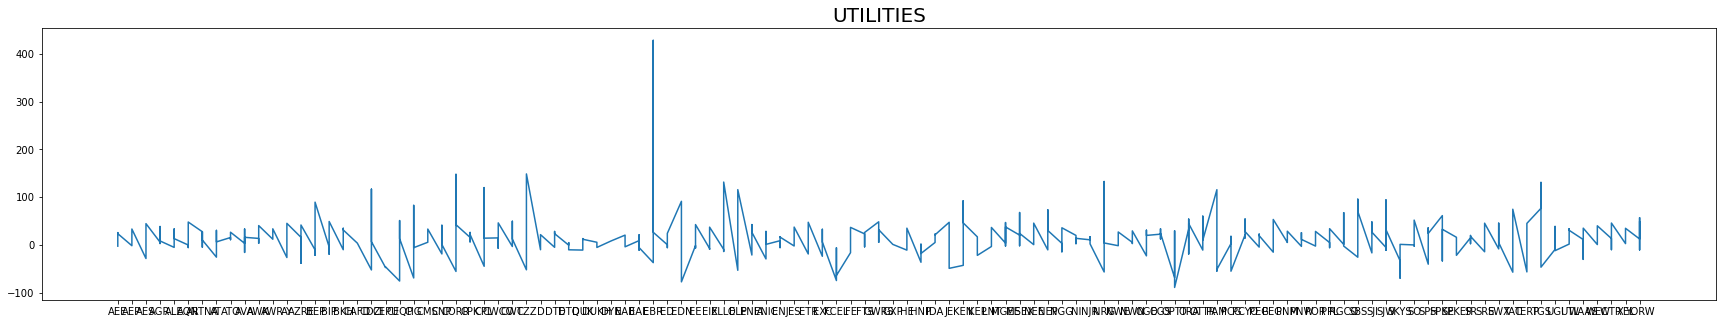

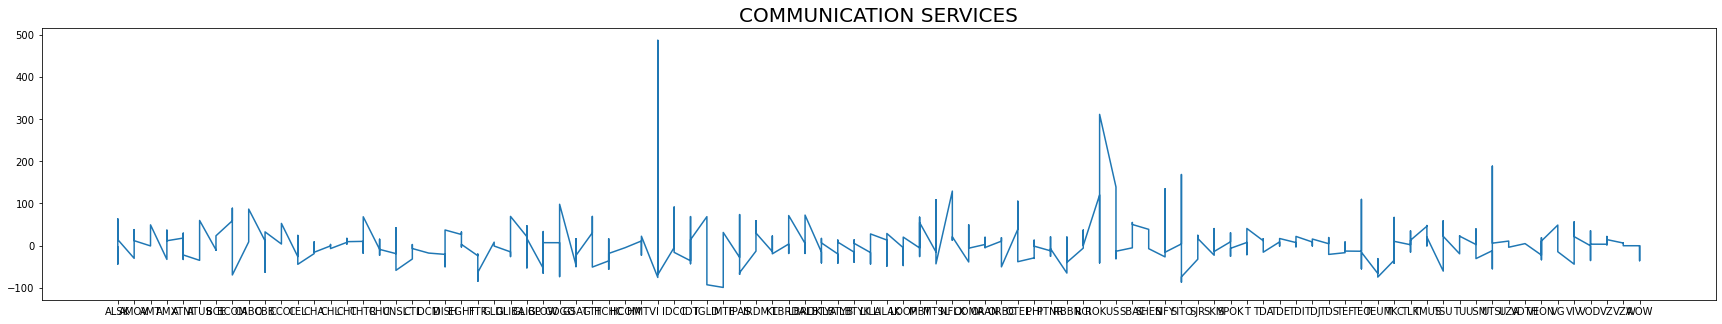

In [8]:
eda.plot_price_variation_per_sector(df_postinorganic)

---
## NaN-Values

In [9]:
df_postinorganic.drop(columns=["PRICE VAR [%]"], inplace=True)

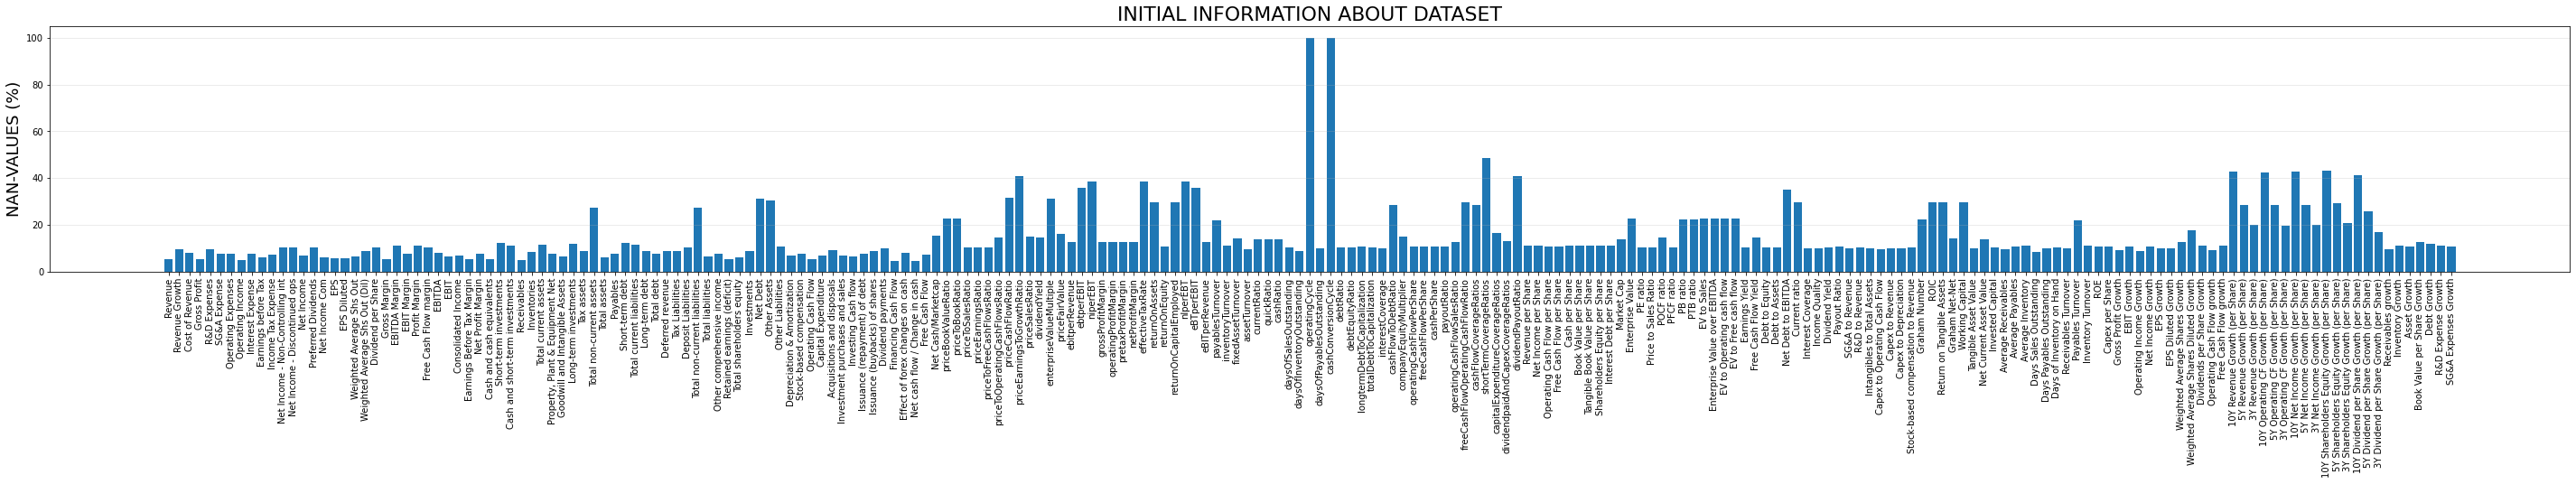

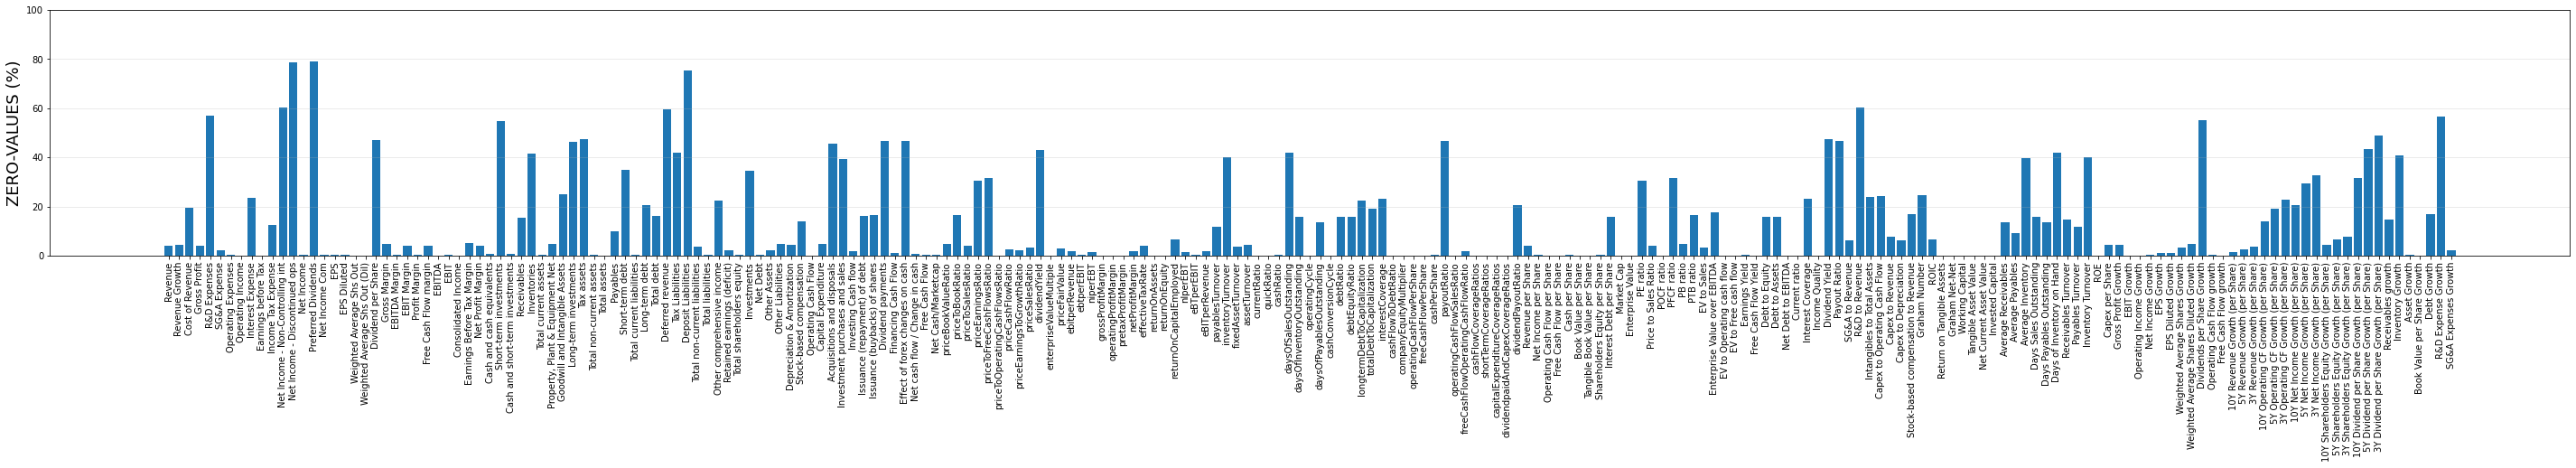

In [10]:
# Plot initial status of data quality in terms of nan-values and zero-values
nan_vals = df_postinorganic.select_dtypes(include="number").isna().sum()
zero_vals = df_postinorganic.select_dtypes(include="number").isin([0]).sum()
ind = np.arange(df_postinorganic.select_dtypes(include="number").shape[1])

plt.figure(figsize=(50,5))
plt.title('INITIAL INFORMATION ABOUT DATASET', fontsize=22)
plt.bar(ind, nan_vals.values / df_postinorganic.shape[0] * 100)
plt.xticks(ind, nan_vals.index.values, rotation='90')
plt.ylabel('NAN-VALUES (%)', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(50,5))
plt.bar(ind, zero_vals.values / df_postinorganic.shape[0] * 100)
plt.ylabel('ZERO-VALUES (%)', fontsize=18)
plt.xticks(ind, nan_vals.index.values, rotation='90')
plt.yticks([0, 20, 40, 60, 80, 100])
plt.grid(alpha=0.3, axis='y')
plt.show()

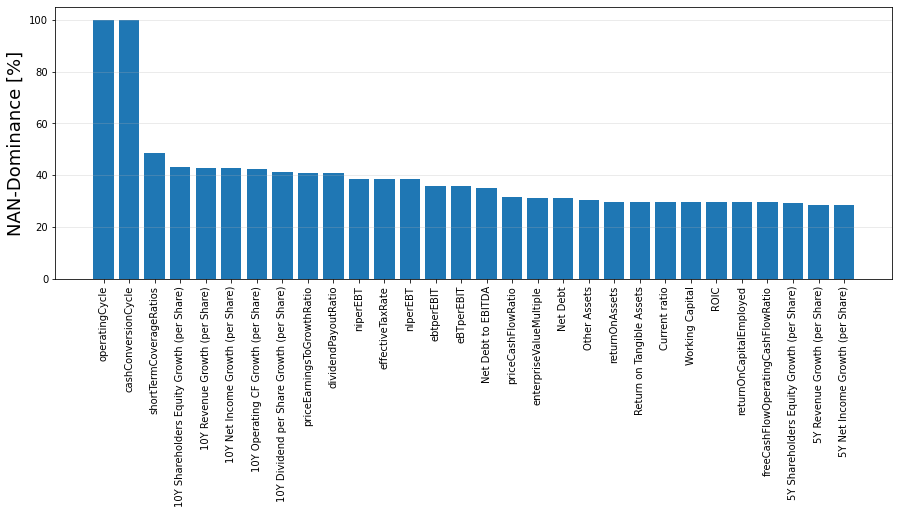

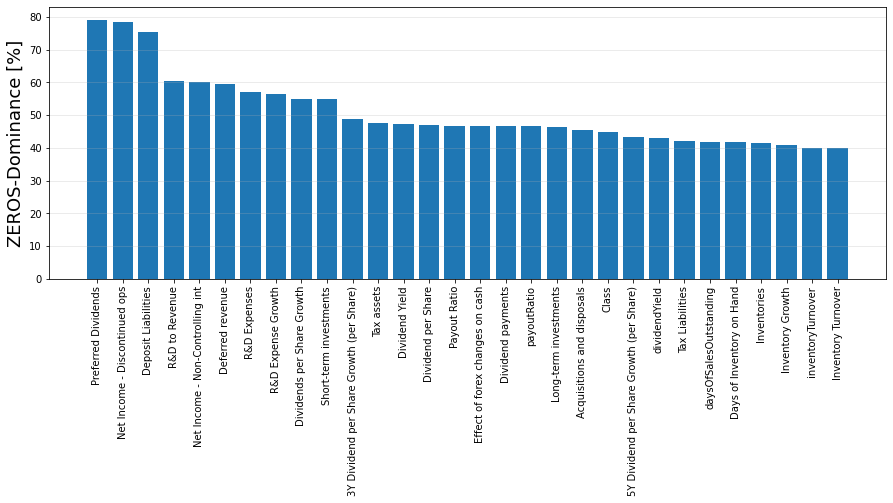

In [11]:
# Find count and percent of nan-values, zero-values
total_nans = df_postinorganic.isnull().sum().sort_values(ascending=False)
percent_nans = (df_postinorganic.isnull().sum()/df_postinorganic.isnull().count() * 100).sort_values(ascending=False)
total_zeros = df_postinorganic.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (df_postinorganic.isin([0]).sum()/df_postinorganic.isin([0]).count() * 100).sort_values(ascending=False)
df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

# Graphical representation
plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_nans['Percent NaN'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('NAN-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('ZEROS-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

In [12]:
# Find reasonable threshold for nan-values situation
test_nan_level = 0.5
print(df_nans.quantile(test_nan_level))
_, thresh_nan = df_nans.quantile(test_nan_level)

# Find reasonable threshold for zero-values situation
test_zeros_level = 0.6
print(df_zeros.quantile(test_zeros_level))
_, thresh_zeros = df_zeros.quantile(test_zeros_level)

Total NaN      2351.000000
Percent NaN      10.790839
Name: 0.5, dtype: float64
Total Zeros      1373.400000
Percent Zeros       6.303759
Name: 0.6, dtype: float64


In [13]:
# Clean dataset applying thresholds for both zero values, nan-values
print(f'INITIAL NUMBER OF VARIABLES: {df_postinorganic.shape[1]}')
print()

df_postnan = df_postinorganic.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, 1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {df_postnan.shape[1]}')
#print()

#df_zeros_postnan = df_zeros.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=0)
#df_test2 = df_postnan.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
#print(f'NUMBER OF VARIABLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {df_test2.shape[1]}')

INITIAL NUMBER OF VARIABLES: 225

NUMBER OF VARIABLES AFTER NaN THRESHOLD 10.79%: 113


---

## Outlier detection

Large discrepancy between 75% (25%) quantile and max (min) value.

In [14]:
df_postnan.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,ROE,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Operating Cash Flow growth,Receivables growth,Asset Growth
count,2.062700e+04,19733.000000,2.002800e+04,2.058500e+04,1.967100e+04,2.013000e+04,2.009200e+04,2.069100e+04,2.008000e+04,2.043400e+04,...,1.947600e+04,19805.000000,19474.000000,19845.000000,19437.00000,19644.000000,1.963400e+04,19751.000000,19698.000000,19436.000000
mean,5.224210e+09,3.643239,3.299437e+09,1.994874e+09,1.045500e+08,8.804195e+08,1.384550e+09,5.975615e+08,9.904222e+07,4.984850e+08,...,1.668165e+03,19.149117,0.675743,0.472968,-2.26172,0.283588,2.021222e+03,64.990986,11.090810,1.122494
std,3.218380e+10,314.660823,2.600706e+10,8.793378e+09,7.727381e+08,3.829332e+09,5.700663e+09,2.996034e+09,5.027875e+08,2.495747e+09,...,1.155947e+05,2396.364899,234.280752,189.670071,250.60381,37.977852,2.831814e+05,5274.392716,1108.171722,45.646944
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-3.477246e+04,-5536.483300,-16888.000000,-18881.000000,-33777.00000,-2125.000000,-2.125000e+03,-18001.000000,-1.000000,-1.000000
25%,6.022900e+07,-0.014800,3.528336e+06,3.147700e+07,0.000000e+00,1.795175e+07,3.613850e+07,-4.101000e+06,0.000000e+00,-8.381382e+06,...,-6.340000e-02,-0.024100,-0.289875,-0.267400,-0.40490,-0.321850,-3.182000e-01,-0.278550,-0.051275,-0.030825
50%,4.428560e+08,0.057300,1.580950e+08,1.984820e+08,0.000000e+00,8.179200e+07,1.590000e+08,3.711700e+07,3.853500e+06,2.462700e+07,...,7.170000e-02,0.062300,0.059300,0.057300,0.06190,0.097250,9.770000e-02,0.045900,0.009900,0.047700
75%,2.326026e+09,0.180900,1.203600e+09,8.970000e+08,1.216150e+07,3.767000e+08,6.298728e+08,2.600740e+08,5.070725e+07,2.007555e+08,...,1.459000e-01,0.210300,0.418225,0.368400,0.53080,0.582100,5.825750e-01,0.406550,0.199875,0.174225
max,1.886894e+12,42138.663900,1.581527e+12,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,1.114114e+07,336767.800000,20598.428600,13545.338700,3159.00000,4378.049200,3.967977e+07,455999.000000,153332.333300,5468.426400


In [15]:
df_postcleaning = cleaning.remove_outliers(df_postnan, density_sensitive_cols=df_postnan.columns, verbose=True)

--> 190 outlier detected and removed from Revenue column using zscore.
--> 5 outlier detected and removed from Revenue Growth column using zscore.
--> 4 outlier detected and removed from Cost of Revenue column using zscore.
--> 222 outlier detected and removed from Gross Profit column using zscore.
--> 104 outlier detected and removed from R&D Expenses column using zscore.
--> 89 outlier detected and removed from SG&A Expense column using zscore.
--> 23 outlier detected and removed from Operating Expenses column using zscore.
--> 68 outlier detected and removed from Operating Income column using zscore.
--> 90 outlier detected and removed from Interest Expense column using zscore.
--> 41 outlier detected and removed from Earnings before Tax column using zscore.
--> 3 outlier detected and removed from Income Tax Expense column using zscore.
--> 75 outlier detected and removed from Net Income - Non-Controlling int column using zscore.
--> 63 outlier detected and removed from Net Income -

In [16]:
df_postcleaning.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,ROE,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Operating Cash Flow growth,Receivables growth,Asset Growth
count,1.768700e+04,16948.000000,1.723200e+04,1.766100e+04,1.694400e+04,1.733800e+04,1.729300e+04,1.774500e+04,1.726800e+04,1.751900e+04,...,16778.000000,17012.000000,16780.000000,17045.000000,16750.000000,16879.00000,16870.000000,16961.000000,16920.000000,16743.000000
mean,1.872170e+09,0.555571,1.232916e+09,6.703131e+08,3.312667e+07,3.342600e+08,4.872601e+08,1.965669e+08,4.268857e+07,1.587997e+08,...,-2.075932,0.937600,0.205397,0.009884,0.137834,0.11258,0.104856,0.013246,0.821219,0.303820
std,4.463131e+09,11.068993,3.553888e+09,1.408391e+09,1.322422e+08,8.031363e+08,1.036249e+09,5.625861e+08,1.093019e+08,5.292994e+08,...,268.530858,69.521674,14.211964,11.137586,11.699059,5.66413,5.619880,50.031192,17.513492,2.450566
min,-3.819270e+08,-5.952500,-2.986888e+09,-2.050000e+09,-1.098000e+08,-1.401594e+08,-1.088448e+09,-5.142000e+09,-5.260000e+08,-5.476000e+09,...,-34772.459600,-5536.483300,-432.714300,-385.307700,-259.307700,-95.00000,-95.000000,-5831.500000,-1.000000,-1.000000
25%,5.350550e+07,-0.011600,3.000000e+06,2.802400e+07,0.000000e+00,1.710900e+07,3.303000e+07,-5.079799e+06,0.000000e+00,-9.149500e+06,...,-0.075850,-0.020400,-0.292000,-0.267800,-0.393075,-0.30560,-0.302225,-0.288300,-0.050100,-0.028200
50%,3.563220e+08,0.059600,1.245060e+08,1.612790e+08,0.000000e+00,6.911600e+07,1.315470e+08,2.862900e+07,2.610000e+06,1.968600e+07,...,0.069200,0.065500,0.061150,0.060900,0.066250,0.10000,0.101000,0.048700,0.008400,0.051700
75%,1.590350e+09,0.186000,8.741955e+08,6.145210e+08,1.163677e+07,2.705352e+08,4.461000e+08,1.798900e+08,3.401400e+07,1.421993e+08,...,0.140000,0.218000,0.421450,0.377200,0.529100,0.57655,0.575950,0.414500,0.205525,0.180550
max,7.536900e+10,710.679500,6.708900e+10,1.660300e+10,2.052300e+09,1.056300e+10,1.569000e+10,6.916666e+09,1.346000e+09,6.522000e+09,...,427.725700,5470.750000,566.908000,454.699200,607.358500,97.00000,97.000000,866.000000,1340.695700,112.344800


---

## Filling NaNs

In [17]:
df_postfilling1 = cleaning.fill_na(df_postcleaning, "Stock")
df_postfilling2 = cleaning.fill_na(df_postfilling1, "Sector")

Filled 15911/183670 NaN-entries by grouping the Stock column.
Filled 167759/167759 NaN-entries by grouping the Sector column.


---

## Correlated features

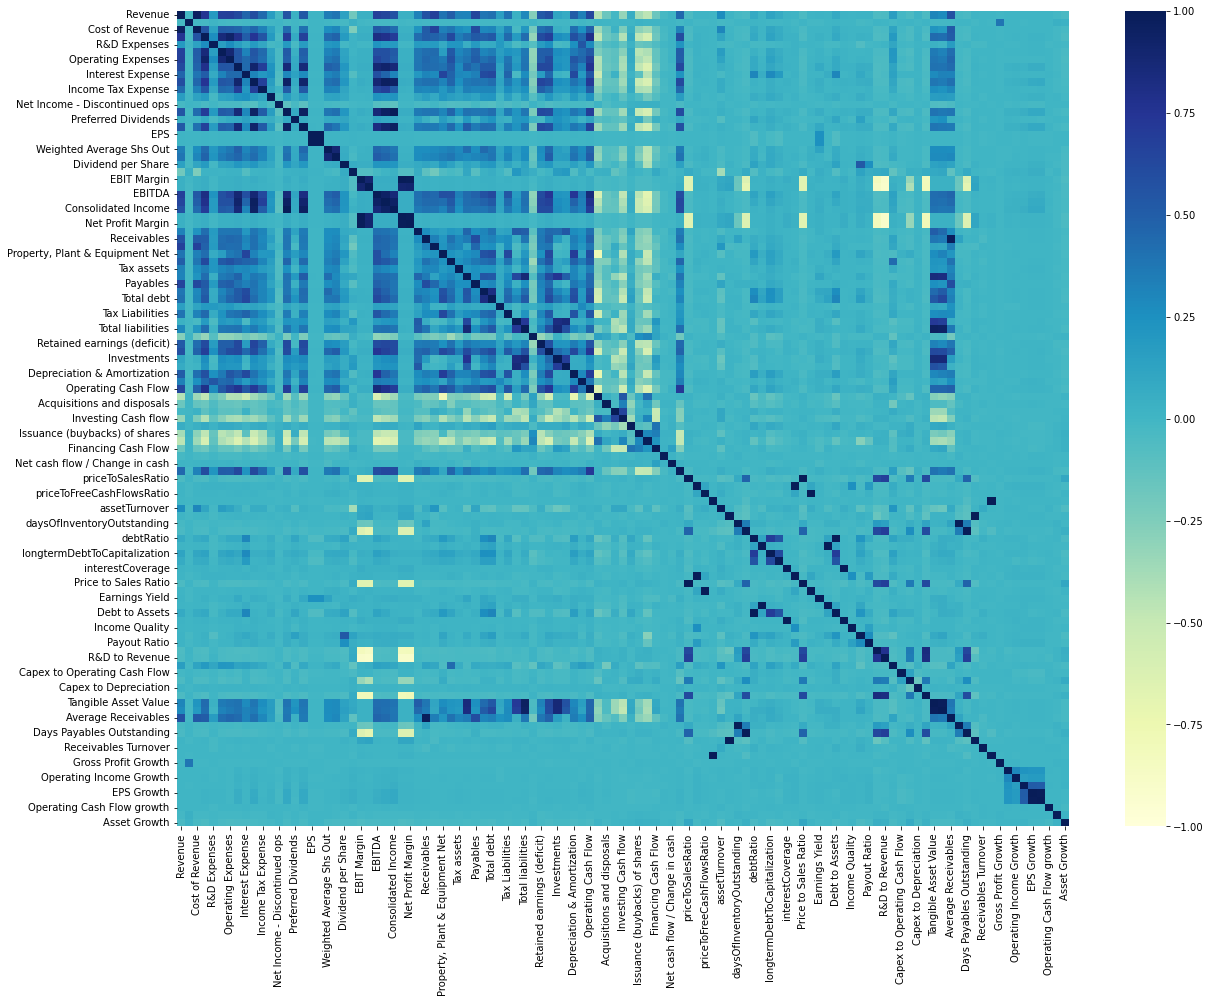

In [18]:
eda.plot_correlation_matrix(df_postfilling2)

In [19]:
df_postcorrelation = cleaning.remove_highly_correlated_features(df_postfilling2, bound=0.95)

Removing features with a correlation of 0.95 or greater.
Dropped: Debt to Assets
Dropped: Days Payables Outstanding
Dropped: Days of Inventory on Hand
Dropped: Debt to Equity
Dropped: ROE
Dropped: EPS Diluted
Dropped: PFCF ratio
Dropped: Days Sales Outstanding
Dropped: Price to Sales Ratio
Dropped: Interest Coverage
Dropped: PE ratio
Dropped: Earnings Before Tax Margin
Dropped: Consolidated Income
Dropped: Net Profit Margin
Dropped: EPS Diluted Growth
Dropped: Invested Capital
Dropped: Average Receivables
Dropped: EBIT
Dropped: Cost of Revenue
Dropped: Net Income Com
Dropped: Tangible Asset Value


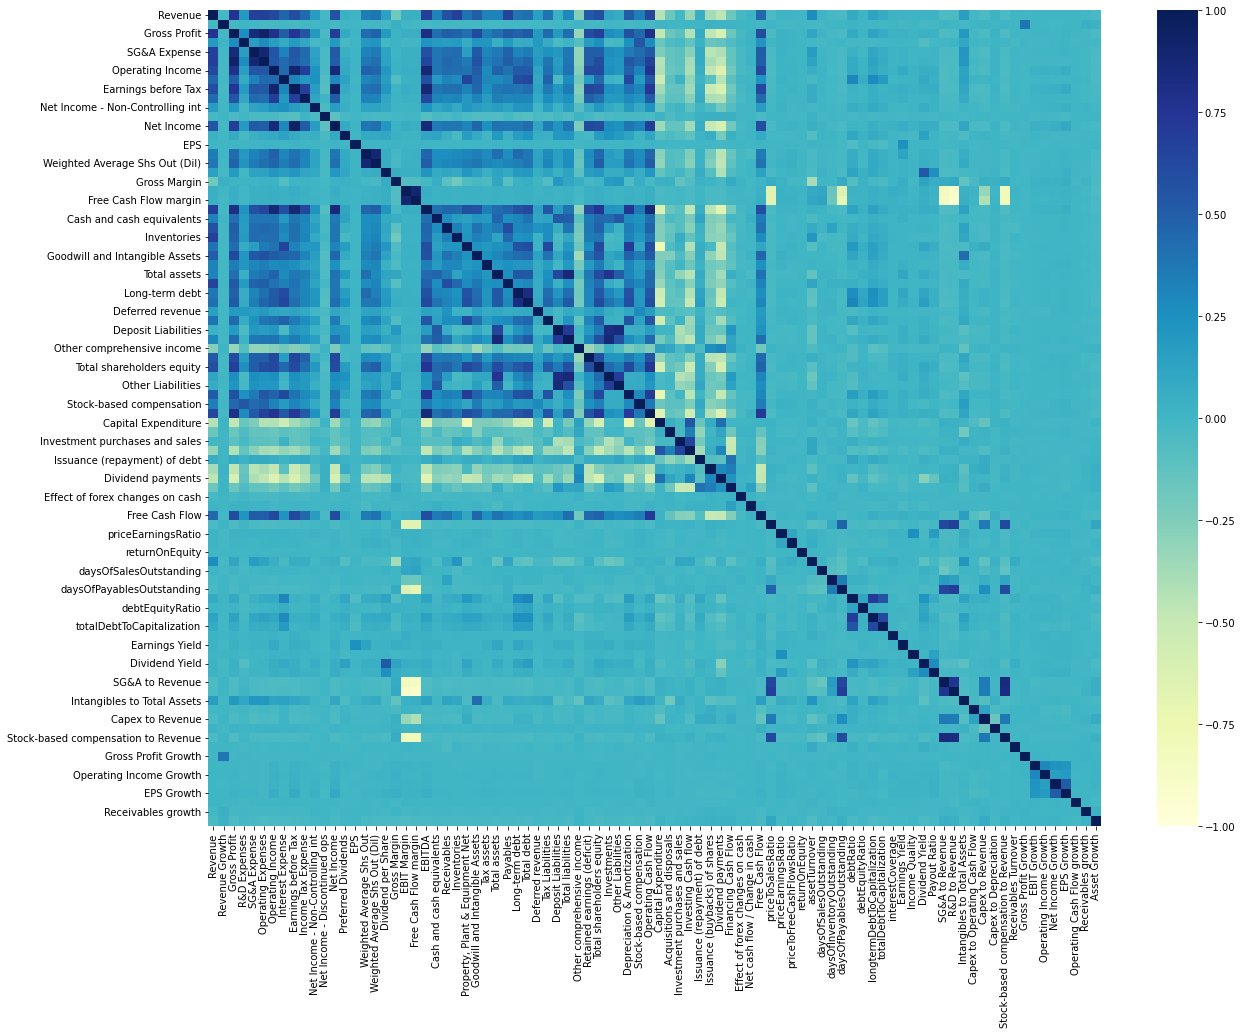

In [20]:
eda.plot_correlation_matrix(df_postcorrelation)

---

## Saving data

In [21]:
utils.write_csv(df_postcorrelation.reset_index(drop=True), "Cleaned_Financial_Data2.csv")